In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('data.csv')
data = data.drop(columns=['Date','BTCTOMORROW'])
data.tail(3)

,BTC,ETH,XRP,USDT,BSV,BCH,LTC,EOS,BNB,ADA
670,10242.35,351.11,0.24,1.0,169.58,224.68,47.90,2.76,24.53,0.09
671,10363.14,368.10,0.24,1.0,166.70,227.71,48.72,2.78,24.56,0.10
672,10400.91,374.70,0.24,1.0,167.56,225.54,49.09,2.79,25.45,0.10


In [4]:
# Features construction 
#data['Change BTC (USD)'] = (data['BTC'].shift(-1) - data['BTC'])
#data['GROW'] = np.where(data['Change BTC (USD)'].shift(-1) > data['Change BTC (USD)'], 1, -1)
#data['percent_change'] = ((data['BTC'].shift(-1)-data['BTC'])/data['BTC']).pct_change()
data.dropna(inplace=True)

# X is the input variable
X = data

# Y is the target or output variable
y = np.where((data['BTC'].shift(-1) - data['BTC']) > 0, 1, -1)
data.tail(10)

,BTC,ETH,XRP,USDT,BSV,BCH,LTC,EOS,BNB,ADA
663,11414.03,440.04,0.28,1.00,183.57,264.12,58.10,3.10,24.69,0.12
664,10245.30,385.67,0.25,1.01,152.35,216.06,47.77,2.64,20.62,0.10
665,10511.81,388.24,0.26,1.00,160.56,231.87,50.61,3.01,21.06,0.10
666,10169.57,335.26,0.24,1.00,162.10,225.30,47.59,2.93,19.48,0.09
667,10280.35,353.36,0.24,1.00,163.50,228.45,48.05,2.91,23.19,0.09
668,10369.56,352.67,0.24,1.00,174.15,228.61,48.77,2.85,22.39,0.09
669,10131.52,337.60,0.24,1.00,170.57,222.54,47.38,2.76,23.19,0.09
670,10242.35,351.11,0.24,1.00,169.58,224.68,47.90,2.76,24.53,0.09
671,10363.14,368.10,0.24,1.00,166.70,227.71,48.72,2.78,24.56,0.10
672,10400.91,374.70,0.24,1.00,167.56,225.54,49.09,2.79,25.45,0.10


In [5]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.80)
split

538

In [6]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(538, 10) (135, 10)
(538,) (135,)


In [7]:
clf = RandomForestClassifier(random_state=100, max_features= 10)

In [8]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

In [11]:
# Calculate feature importances
importances = model.feature_importances_
importances

array([0.14165209, 0.12799581, 0.06576381, 0.02025482, 0.14480607,
       0.11362062, 0.1423156 , 0.0956065 , 0.13590788, 0.01207681])

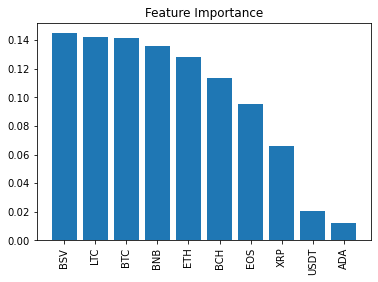

array([4, 6, 0, 8, 1, 5, 7, 2, 3, 9], dtype=int64)

In [10]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [data.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()
indices

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Correct Prediction (%): ', accuracy_score(y_test, y_pred, normalize=True) * 100.0)

In [ ]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

In [ ]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()